In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
from keras.utils import img_to_array, to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
corn_path=('/content/drive/MyDrive/Plant Disease-20240408T123835Z-001/Plant Disease/Corn_(maize)___Common_rust_');
potato_path=('/content/drive/MyDrive/Plant Disease-20240408T123835Z-001/Plant Disease/Potato___Early_blight');
tomato_path=('/content/drive/MyDrive/Plant Disease-20240408T123835Z-001/Plant Disease/Tomato___Bacterial_spot');

In [ ]:
# now we want to see the number of images
corn_img = len(os.listdir(corn_path))
corn_img

300

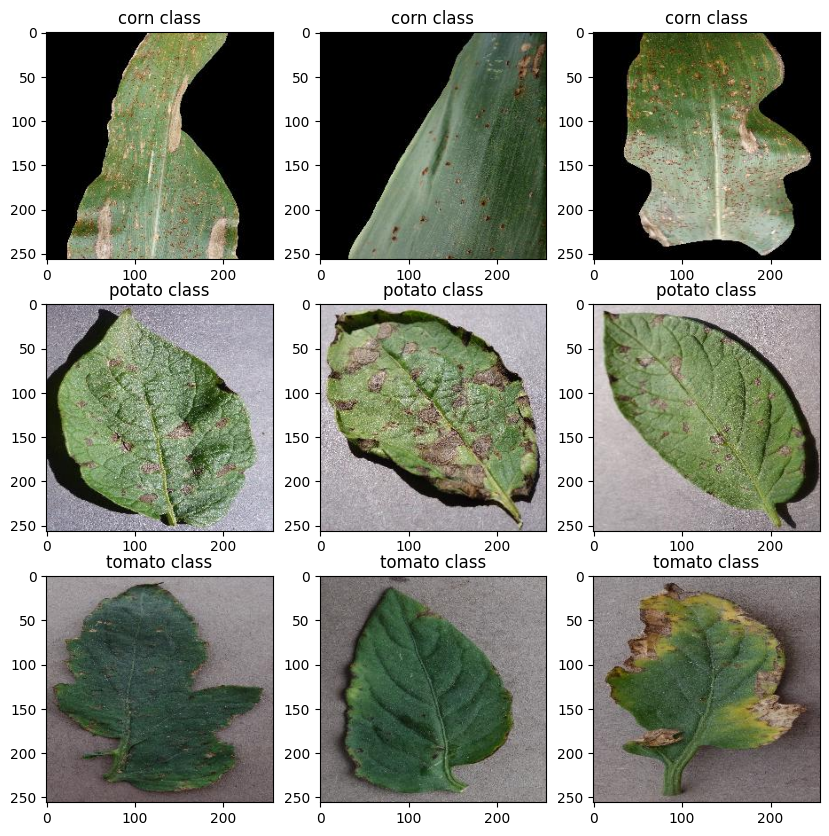

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
# ravel - flattened array, converts 2d data into 1d array
ax=ax.ravel()
m=0
for i in range(3):
  img=plt.imread(corn_path+'/'+random.choice(os.listdir(corn_path)))
  ax[m].imshow(img)
  ax[m].set_title("corn class")
  m+=1

for i in range(3):
  img=plt.imread(potato_path+'/'+random.choice(os.listdir(potato_path)))
  ax[m].imshow(img)
  ax[m].set_title("potato class")
  m+=1

for i in range(3):
  img=plt.imread(tomato_path+'/'+random.choice(os.listdir(tomato_path)))
  ax[m].imshow(img)
  ax[m].set_title("tomato class")
  m+=1

In [ ]:
def convert_image_array(image):
  try:
    img=cv2.imread(image)
    if img is not None:
      img=cv2.resize(img,(256,256)) # we are resizing the images bcz there can be images of non-equal dimensions
      return img_to_array(img)
    else:
      return np.array([]) # blank array
  except Exception as e:
    print("Error", e)

In [ ]:
# task: to store images into list and with their levels
# we want to convert the images into the list, so we will store the path of the folder
path="/content/drive/MyDrive/Plant Disease-20240408T123835Z-001/Plant Disease"
root_path=os.listdir(path)
print(root_path)

['Tomato___Bacterial_spot', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_']


In [ ]:
img_list, img_label=[], []
temp=-1
for dir in root_path:
  all_img_list=os.listdir(path+'/'+dir)
  temp+=1
  for files in all_img_list:
    img_path=path+'/'+dir+'/'+files # to get the path of the file for a particular class
    img_list.append(convert_image_array(img_path))
    img_label.append(temp)



In [ ]:
print(img_label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
img_list[0].shape # 3 represents the colour image, 3 channel

(256, 256, 3)

In [ ]:
img_list[0]

array([[[133., 138., 139.],
        [138., 143., 144.],
        [140., 145., 146.],
        ...,
        [145., 147., 147.],
        [145., 147., 147.],
        [144., 146., 146.]],

       [[123., 128., 129.],
        [127., 132., 133.],
        [129., 134., 135.],
        ...,
        [143., 145., 145.],
        [144., 146., 146.],
        [144., 146., 146.]],

       [[126., 131., 132.],
        [128., 133., 134.],
        [128., 133., 134.],
        ...,
        [141., 143., 143.],
        [142., 144., 144.],
        [143., 145., 145.]],

       ...,

       [[107., 111., 112.],
        [107., 111., 112.],
        [106., 110., 111.],
        ...,
        [140., 142., 142.],
        [140., 142., 142.],
        [140., 142., 142.]],

       [[107., 111., 112.],
        [107., 111., 112.],
        [107., 111., 112.],
        ...,
        [137., 139., 139.],
        [139., 141., 141.],
        [142., 144., 144.]],

       [[108., 112., 113.],
        [108., 112., 113.],
        [106., 1

In [ ]:
# normalize the image
# for above we have value between 0 to 255, so after the next step the value will be between 0 to 1 for all image matrix
nor_image=np.array(img_list, dtype=np.float16)/255.0

In [ ]:
# when we pass arguments to NN it has to be a column
# but here in image it in itself is a feature

# (-1, 256, 256, 3) -> first argument represent the number of images, instead of -1 we can use 900 bcz this is the case where we know total number of images, but in most of the cases we don't know the number of images

In [ ]:
nor_image = nor_image.reshape(-1,256,256,3)

In [ ]:
nor_image.shape

(900, 256, 256, 3)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(nor_image, img_label, random_state=0)

In [ ]:
# we need to convert to categorical values before passing to CNN
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [ ]:
xtrain,xvalid,ytrain,yvalid=train_test_split(xtrain, ytrain, random_state=0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(50,(5,5),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(Conv2D(10,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 50)      3800      
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      12510     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 10)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 158760)            0         
                                                                 
 dense (Dense)               (None, 100)               15876100  
                                                                 
 dense_1 (Dense)             (None, 20)                2020      
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist=model.fit(xtrain,ytrain, batch_size=32, epochs=5, validation_data=(xvalid,yvalid))

Epoch 1/5
16/16 [==============================] - 17s 456ms/step - loss: 1.5090 - accuracy: 0.5138 - val_loss: 0.7377 - val_accuracy: 0.7278
Epoch 2/5
16/16 [==============================] - 2s 116ms/step - loss: 0.6676 - accuracy: 0.7826 - val_loss: 0.5944 - val_accuracy: 0.8876
Epoch 3/5
16/16 [==============================] - 2s 128ms/step - loss: 0.4450 - accuracy: 0.8241 - val_loss: 0.4092 - val_accuracy: 0.9053
Epoch 4/5
16/16 [==============================] - 2s 117ms/step - loss: 0.2960 - accuracy: 0.9466 - val_loss: 0.1709 - val_accuracy: 0.9645
Epoch 5/5
16/16 [==============================] - 2s 111ms/step - loss: 0.1999 - accuracy: 0.9684 - val_loss: 0.0820 - val_accuracy: 0.9941


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
ypred=model.predict(xtest)
pre1=np.argmax(ypred, axis=1)
actual=np.argmax(ytest,axis=1)

8/8 [==============================] - 0s 35ms/step


In [ ]:
confusion_matrix(actual,pre1)

array([[71,  0,  0],
       [ 2, 76,  0],
       [ 0,  0, 76]])

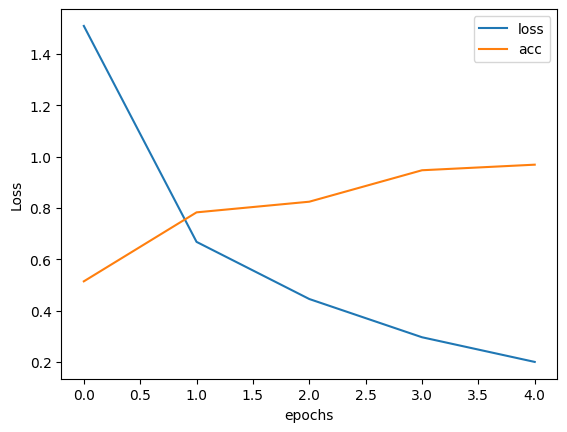

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['accuracy'], label='acc')
plt.xlabel('epochs')
plt.ylabel("Loss")
plt.legend()

In [ ]:
model.save()